# Percolation keras

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:

from numpy.random import seed
seed(1)
import tensorflow as tf 
tf.random.set_seed(2)

In [3]:
import numpy as np
#np.random.seed(1337) # for reproducibility
#np.random.seed(2000) 
from keras.models import Sequential
import keras
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import Conv1D, MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
import tensorflow as tf 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import os

Using TensorFlow backend.


In [4]:
# from numpy.random import seed
# seed(1)
# tf.random.set_seed(2)

In [5]:
# import numpy as np
# np.random.seed(1337) # for reproducibility
# from keras.models import Sequential

In [6]:
# import random as rn

# # The below is necessary in Python 3.2.3 onwards to
# # have reproducible behavior for certain hash-based operations.
# # See these references for further details:
# # https://docs.python.org/3.4/using/cmdline.html#envvar-PYTHONHASHSEED
# # https://github.com/fchollet/keras/issues/2280#issuecomment-306959926

# import os
# os.environ['PYTHONHASHSEED'] = '0'

# # The below is necessary for starting Numpy generated random numbers
# # in a well-defined initial state.
# seed=42
# np.random.seed(seed)

# # The below is necessary for starting core Python generated random numbers
# # in a well-defined state.

# # 
# rn.seed(12345)

# # Force TensorFlow to use single thread.
# # Multiple threads are a potential source of
# # non-reproducible results.
# # For further details, see: https://stackoverflow.com/questions/42022950/which-seeds-have-to-be-set-where-to-realize-100-reproducibility-of-training-res

# # session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)


In [13]:
model=Sequential()

model.add(Conv2D(16, kernel_size=(5,5),input_shape=(100, 100, 3),
                activation = 'relu',  padding='valid'))
model.add(Conv2D(16, kernel_size=(5,5),activation = 'relu',
                  padding='same'))
model.add(MaxPooling2D(pool_size =(2, 2), padding='same'))

model.add(Dropout(0.5))
               
model.add(Conv2D(32,kernel_size=(3,3), activation = 'relu', 
                 padding='valid'))  
model.add(Conv2D(32,kernel_size=(3,3), activation = 'relu',
                 padding='same')) 
                 
model.add(MaxPooling2D(pool_size =(2, 2),padding='same')) 
model.add(Dropout(0.5))

model.add(Conv2D(64, kernel_size=(5,5),input_shape=(100, 100, 3),
                activation = 'relu',  padding='valid'))
model.add(Conv2D(64, kernel_size=(5,5),activation = 'relu',padding='same'))
model.add(MaxPooling2D(pool_size =(2, 2),padding='same'))
                  
model.add(Dropout(0.5))


model.add(Flatten())
                             
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))                 
               
model.summary()                

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 96, 96, 16)        1216      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 96, 96, 16)        6416      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 46, 46, 32)        4640      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 46, 46, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 23, 23, 32)       

In [ ]:
#os.getcwd()

In [1]:
#os.chdir('percolation')
#os.getcwd()

In [14]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.1)

test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 16
num_classes=2
training_set = train_datagen.flow_from_directory('training_set_1000',
                                                 subset='training',
                                                 target_size = (100, 100),
                                                 batch_size = batch_size, 
                                                 class_mode='binary',
                                                shuffle=True)




validation_set= train_datagen.flow_from_directory('training_set_1000', 
                                              subset='validation', 
                                              target_size = (100, 100),
                                              batch_size = batch_size,
                                              class_mode='binary',
                                                 shuffle=False,
                                                 seed=42)



                               

                                        

                                                

Found 9001 images belonging to 2 classes.
Found 999 images belonging to 2 classes.


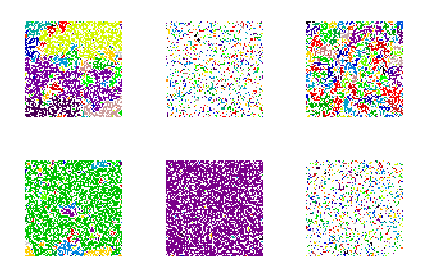

In [15]:
#plt.figure(figsize=(10,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    for x,y in training_set:
        plt.imshow(x[0],cmap='hsv')
        #plt.title('y={}'.format(y[0]))
        plt.axis('off')
        break
plt.tight_layout()
plt.show()

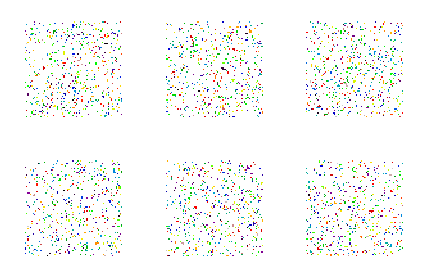

In [16]:
#plt.figure(figsize=(10,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    for x,y in validation_set:
        plt.imshow(x[0],cmap='hsv')
        #plt.title('y={}'.format(y[0]))
        plt.axis('off')
        break
plt.tight_layout()
plt.show()

In [17]:
#from keras.optimizers import SGD
opt1 = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6)
opt2=tf.keras.optimizers.Adam(lr=0.00001, decay=1e-6)
opt3=tf.keras.optimizers.Adadelta(learning_rate=1.0, rho=0.95)
model.compile(optimizer = opt3, loss = 'binary_crossentropy', metrics = ['accuracy'])
history = model.fit_generator(training_set,
                         steps_per_epoch = training_set.samples// batch_size,
                         epochs = 10,
                         validation_data = validation_set,
                         validation_steps = validation_set.samples// batch_size)

Epoch 1/10
562/562 [==============================] - 17s 29ms/step - loss: 0.3576 - accuracy: 0.8277 - val_loss: 0.3852 - val_accuracy: 0.9194
Epoch 2/10
562/562 [==============================] - 15s 27ms/step - loss: 0.1548 - accuracy: 0.9348 - val_loss: 0.9893 - val_accuracy: 0.2994
Epoch 3/10
562/562 [==============================] - 15s 27ms/step - loss: 0.1320 - accuracy: 0.9411 - val_loss: 1.0315 - val_accuracy: 0.4244
Epoch 4/10
562/562 [==============================] - 15s 27ms/step - loss: 0.1271 - accuracy: 0.9432 - val_loss: 0.1882 - val_accuracy: 0.9728
Epoch 5/10
562/562 [==============================] - 15s 27ms/step - loss: 0.1189 - accuracy: 0.9449 - val_loss: 0.1465 - val_accuracy: 0.9536
Epoch 6/10
562/562 [==============================] - 16s 28ms/step - loss: 0.1186 - accuracy: 0.9496 - val_loss: 0.1881 - val_accuracy: 0.9567
Epoch 7/10
562/562 [==============================] - 15s 27ms/step - loss: 0.1165 - accuracy: 0.9475 - val_loss: 0.1961 - val_accuracy:

In [18]:
model.save('Percolation_spanning_sgd_01_copy.h5') 

In [19]:
num_of_train_samples = training_set.samples
num_of_test_samples =validation_set.samples

Y_pred =model.predict_generator(validation_set,validation_set.samples // batch_size+1, verbose=1)
y_pred=(Y_pred > 0.5).astype(int)
confusion_matrix(validation_set.classes, y_pred)

63/63 [==============================] - 2s 26ms/step


array([[552,   0],
       [  9, 438]])

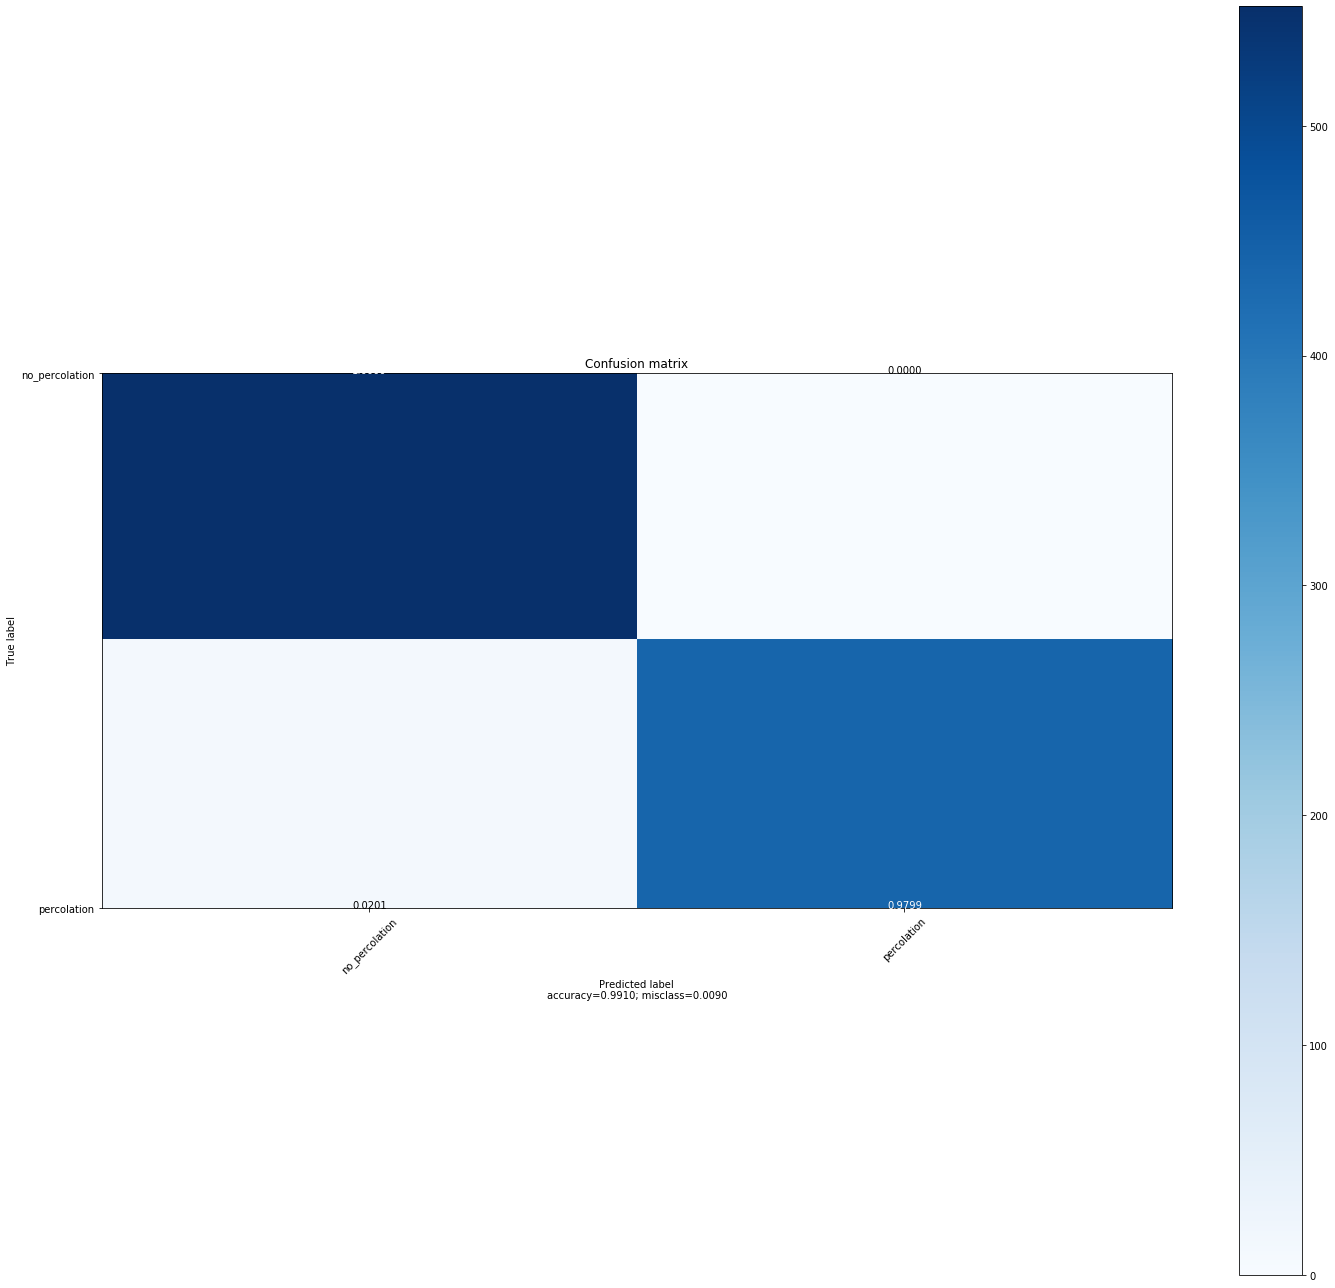

None


In [20]:
from plot_confusion_matrix import *
label=validation_set.class_indices.keys()
print(plot_confusion_matrix(confusion_matrix(validation_set.classes, y_pred),
                          label,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True))

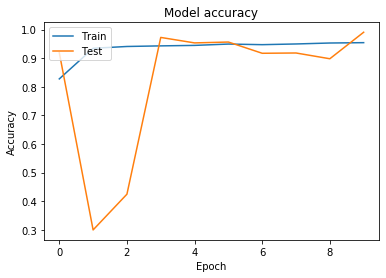

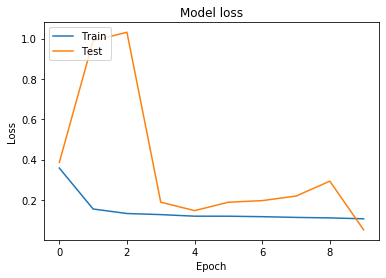

In [28]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [29]:
classification_report(validation_set.classes,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99       552\n           1       1.00      0.98      0.99       447\n\n    accuracy                           0.99       999\n   macro avg       0.99      0.99      0.99       999\nweighted avg       0.99      0.99      0.99       999\n'